## Steps Involved in EDA.
##### 1. Variable Identification.
##### 2. Univariate Analysis.
    - Continuous Variable Analysis.
    - Categorical Variable Analysis.
##### 3. Bi-variate Analysis.
    - Continuous & Continuous.
    - Categorical & Categorical.
    - Categorical & Continuous.

In [1]:
#import library

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
#Reading DataFrame with pandas library and displaying top 5 rows of the DataFrame

df = pd.read_csv('train_LZdllcl.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
#Proportion of "Promoted" and "Non-promoted" in dependent variable
df['is_promoted'].value_counts(normalize = True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

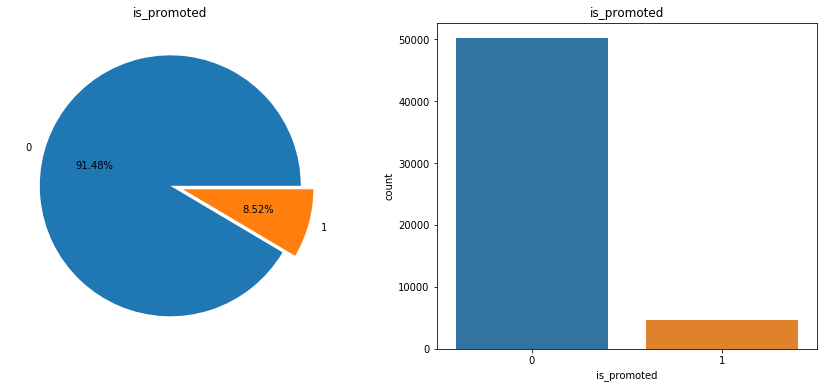

In [4]:
#Exploratory representation of "is_promoted" using Pie-Chart and Count-plot.
f,ax=plt.subplots(1,2,figsize=(15,6)) #setting size of plot

#Ple-chart
df['is_promoted'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('is_promoted')
ax[0].set_ylabel('')

#Count-plot
sns.countplot('is_promoted',data=df,ax=ax[1])
ax[1].set_title('is_promoted')
plt.show()

This is Imbalanced DataSet (
Promoted : 8.52%, 
Not - Promoted : 91.48%)

In [5]:
#More information on DataSet.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
#Droping the dependent feature
df.drop(['is_promoted','employee_id'],axis = 1,inplace = True)

In [7]:
#Percentage of Null-Values in different columns.
df.isnull().sum()*100/len(df)

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

## Variable Identification.

In [8]:
#Collecting the categorical and Continuous Variable together for further ease of Analysis.

cat_obj = []
num_obj = []

for i in df.columns:
    if df[i].dtypes == 'object':
        cat_obj.append(i)
    else:
        num_obj.append(i)

In [9]:
#Numerical Variables
num_obj

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score']

In [10]:
#Categorical Variables
cat_obj

['department', 'region', 'education', 'gender', 'recruitment_channel']

## Univariate Analysis

In [11]:
#Some descriptive statistics of continuous variables 
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


In [12]:
#Statistics of categorical variables
df[cat_obj].describe()

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


##### Univariate Analysis of Continuous Variables.

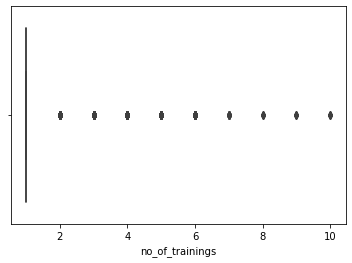

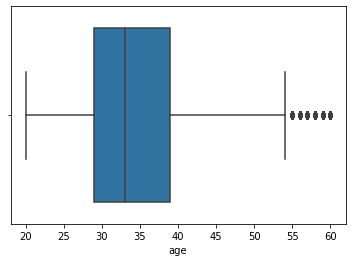

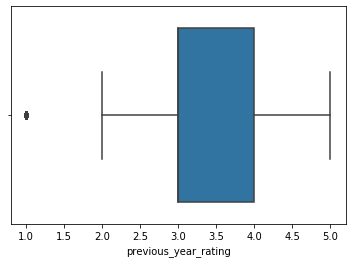

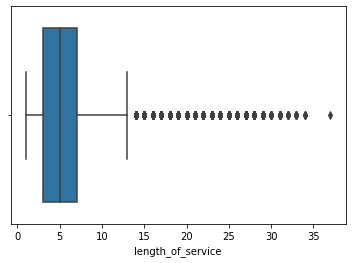

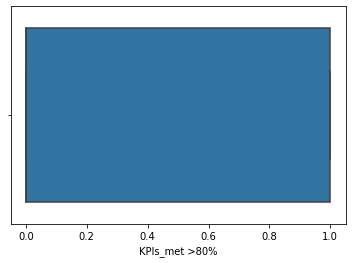

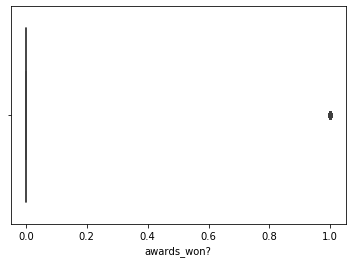

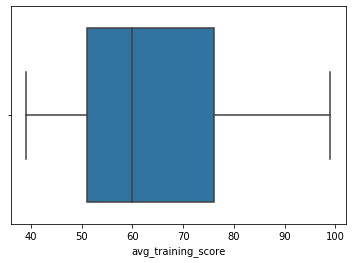

In [13]:
#Continuous Variable Exploration for Outlier detection.

for i in num_obj:
    sns.boxplot(x = df[i])
    plt.show()

- Here we can consider each black dark spot as a Outliers as this is far from their respective median.

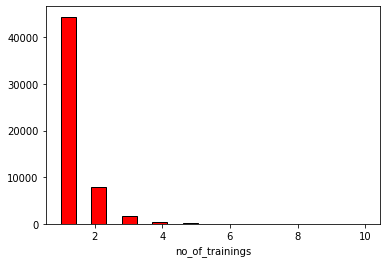

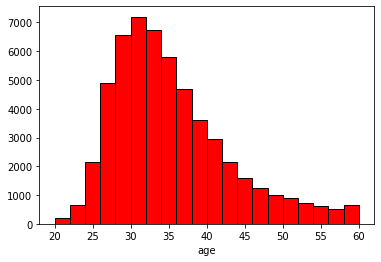

C:\Users\a\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\a\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


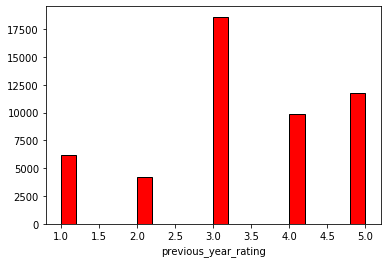

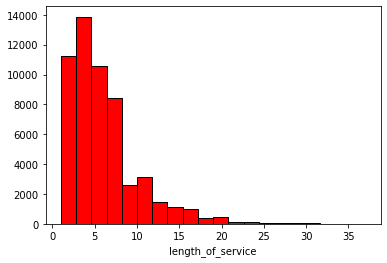

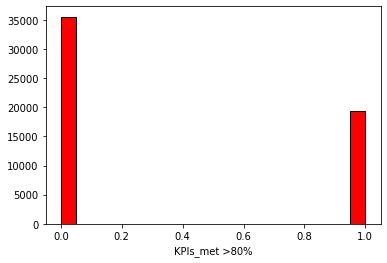

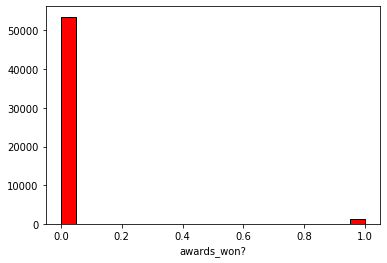

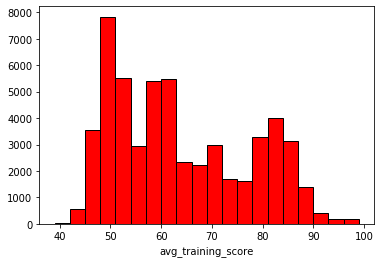

In [14]:
#central tendency and spread of the continuous variable.

for i in num_obj:
    plt.hist(df[i],bins=20,edgecolor='black',color='red');
    plt.xlabel(i)
    plt.show()

- Very few employee has won Awards as the histogram indicates and No of training variables is right skewed.

##### Univariate Analysis of Categorical Variables.

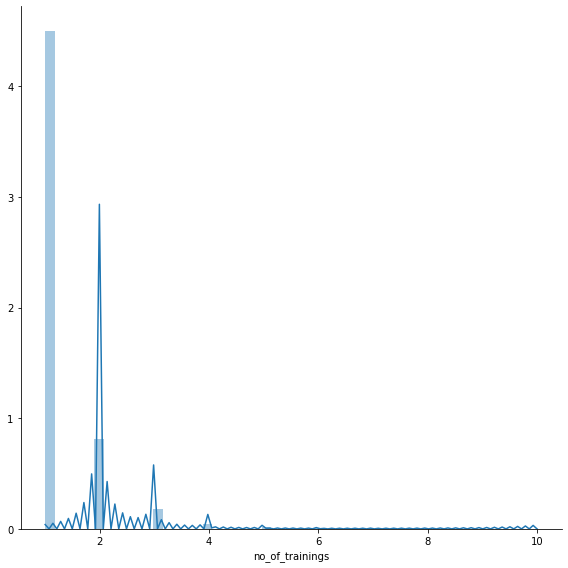

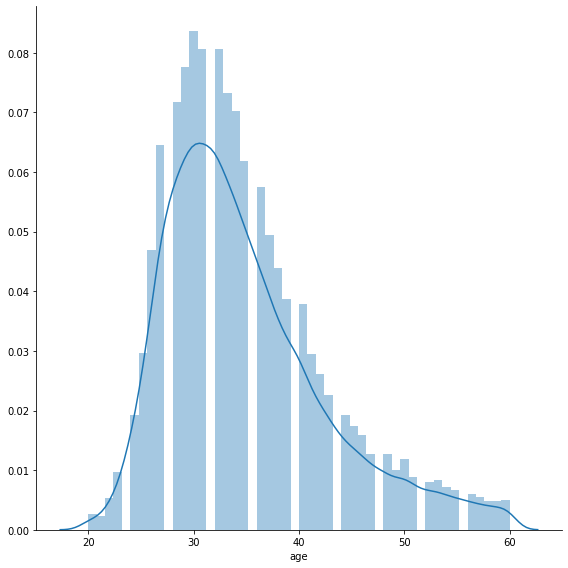

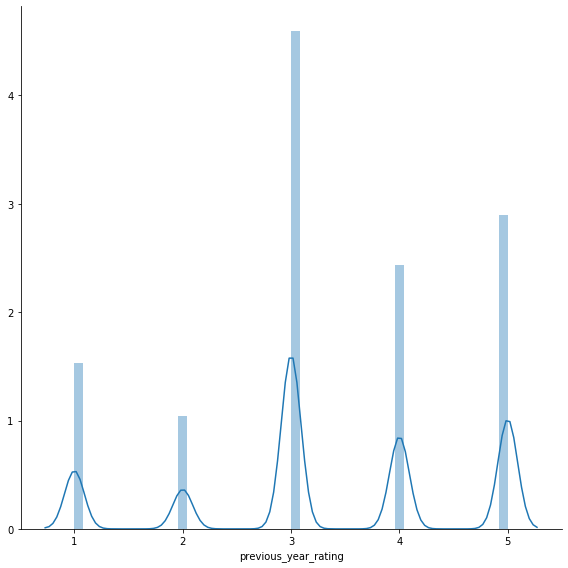

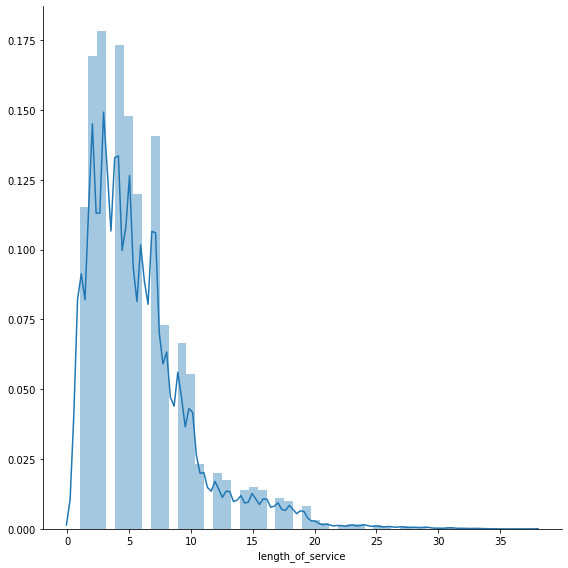

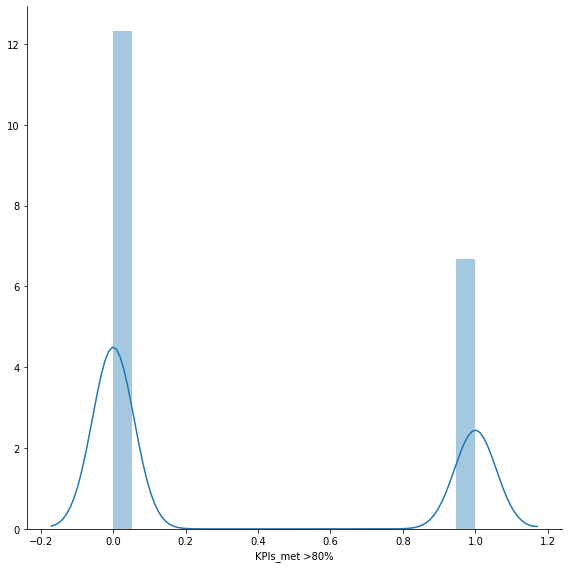

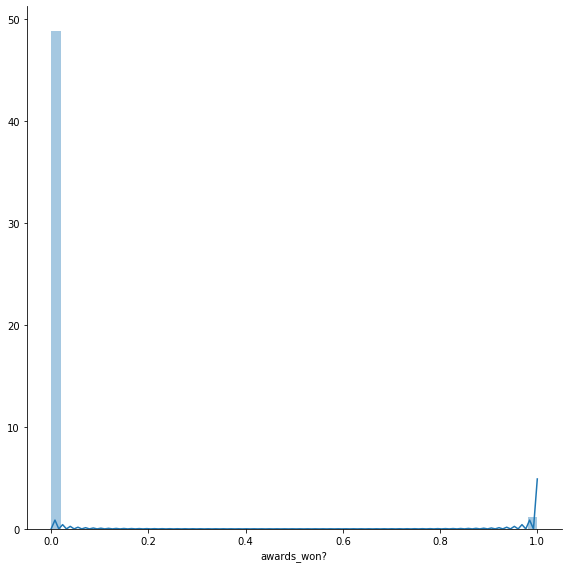

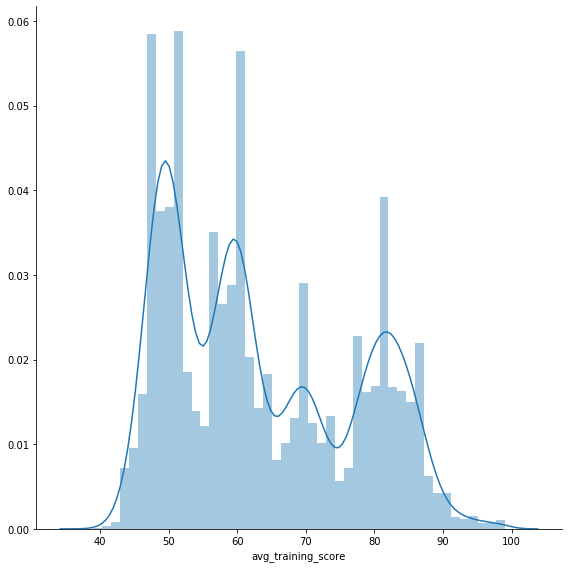

In [39]:
#FacetGrid for continuous variables

for i in num_obj:
    sns.FacetGrid(df,size=8)\
        .map(sns.distplot ,i);
#plt.legend() 

- Distribution od Age seems good.
- No of trainings is right skewed.
- Length of service is also right skewed.
- KPIs met >80% is bimodal.
- Very few have won the awards.

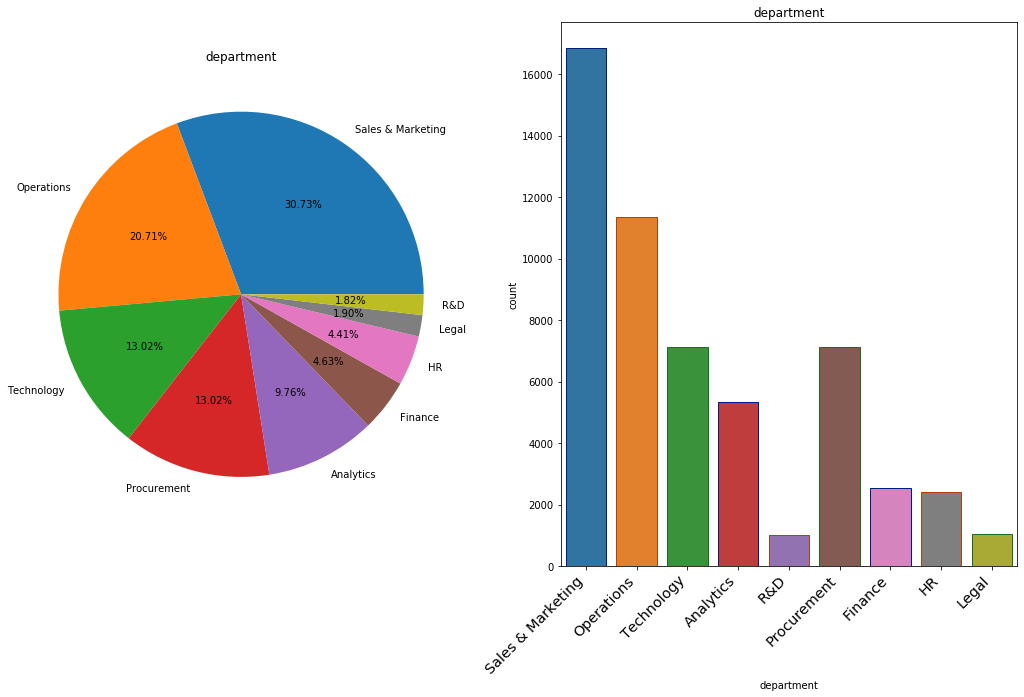

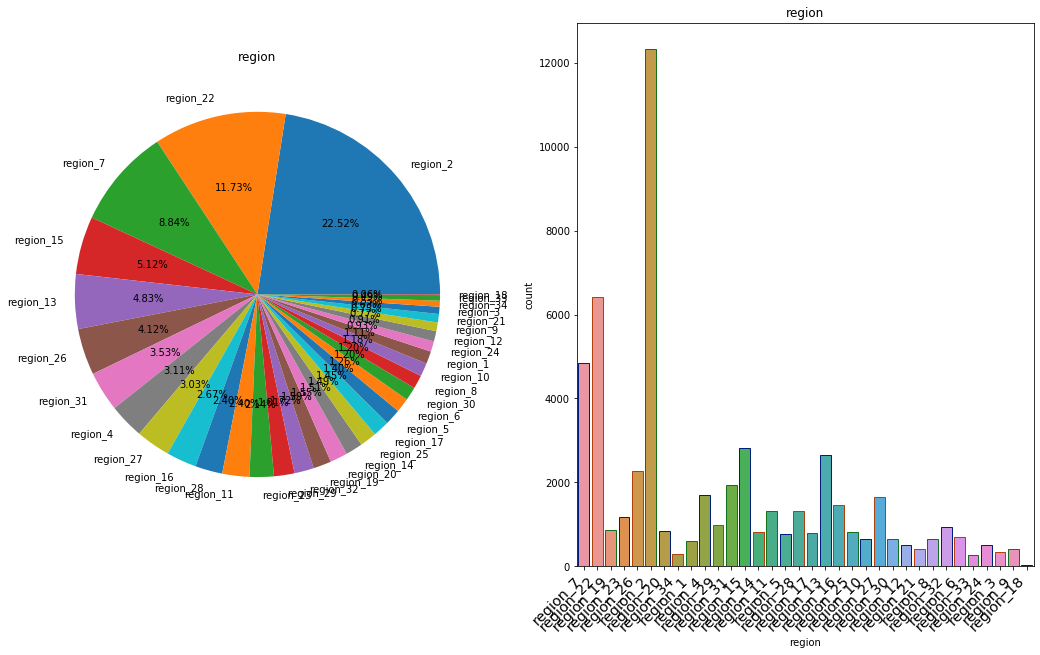

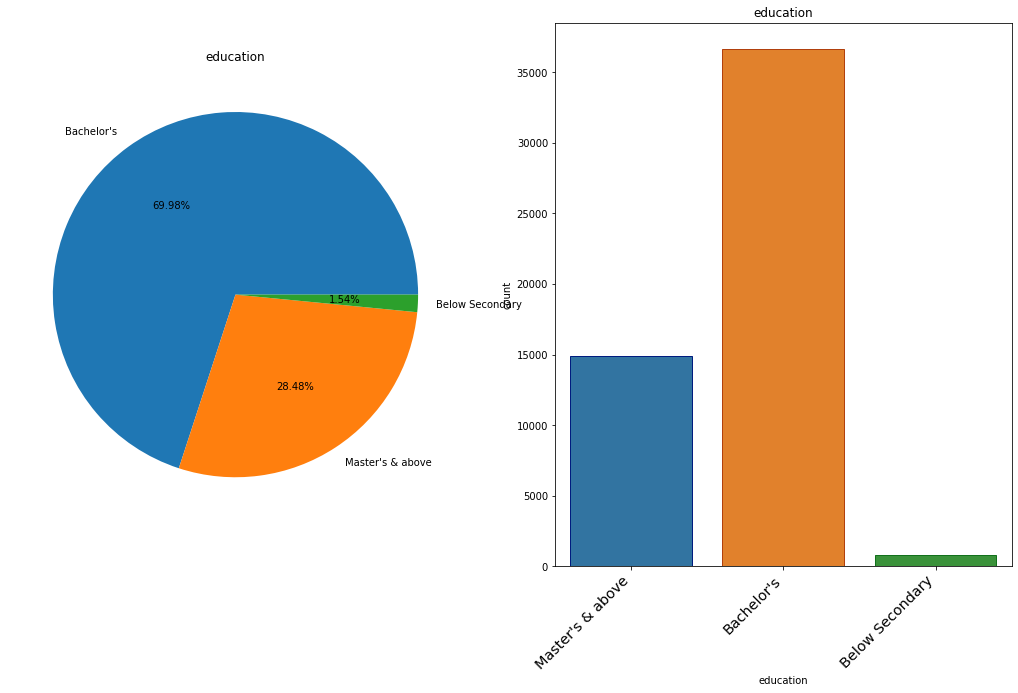

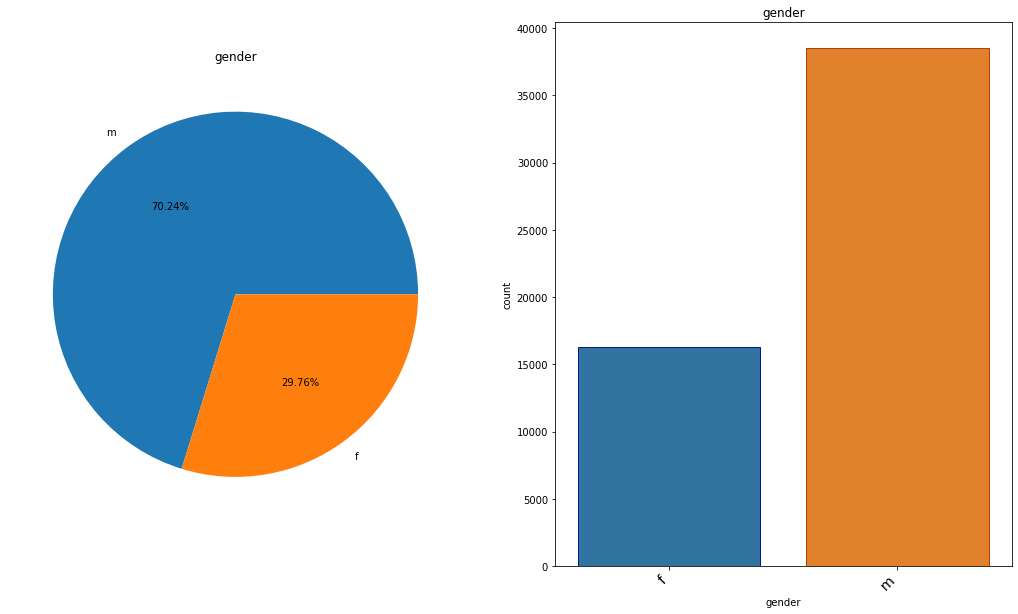

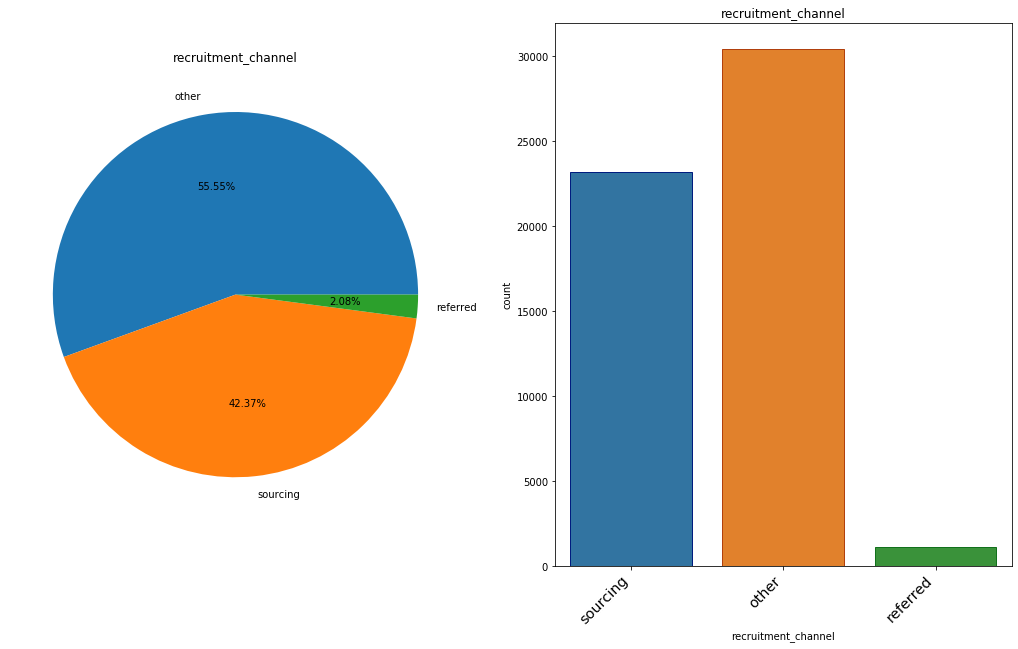

In [15]:
#Count and pie plot of categorical variables
for i in cat_obj:
    f,ax=plt.subplots(1,2,figsize=(18,10))
    #Pie-chart
    df[i].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
    ax[0].set_title(i)
    ax[0].set_ylabel('')
    
    #Count plot
    countplot = sns.countplot(df[i],data=df,ax=ax[1],
                              edgecolor=sns.color_palette("dark", 3))
    ax[1].set_title(i)
    countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, 
                              horizontalalignment='right',fontweight='light',
                              fontsize='x-large')
    plt.show()

## Bivariate Analysis.

#### 1. Continuous & Continuous Data.

In [17]:
num_obj

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score']

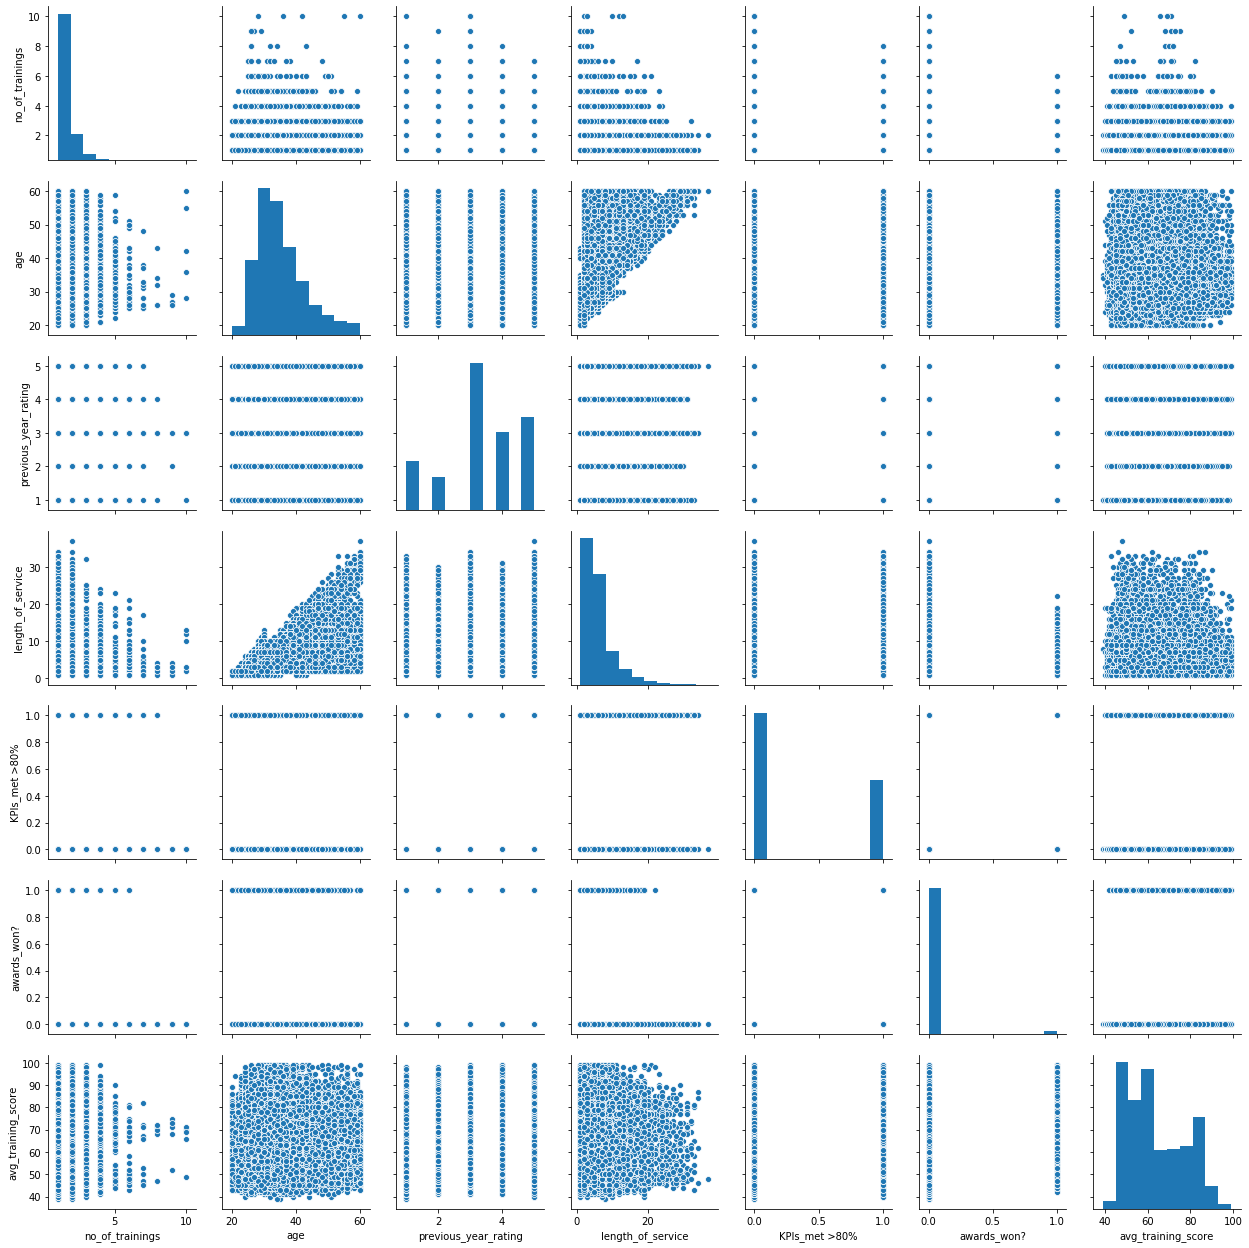

In [18]:
#PairPlot between continuous Data
sns.pairplot(df[num_obj]);

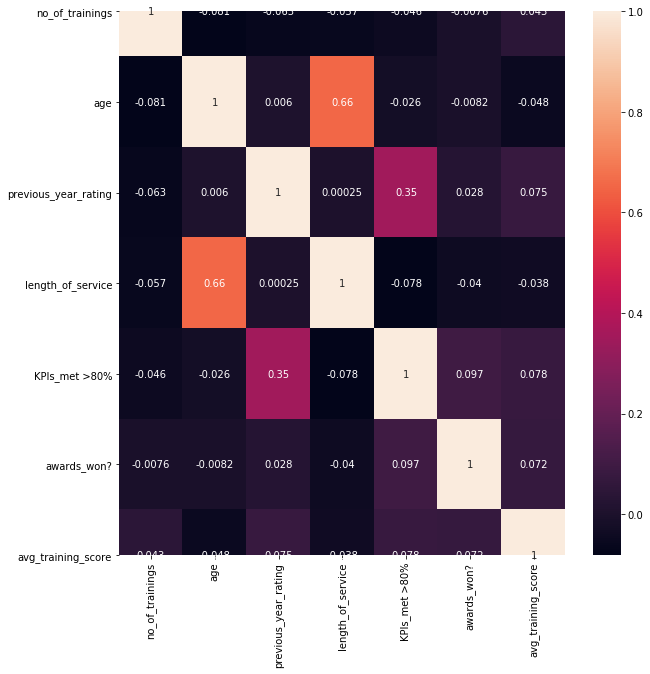

In [19]:
#find the correlation between continuous variables.

plt.figure(figsize=(10,10))
sns.heatmap(df[num_obj].corr(),annot = True)

- Here length of service and age has a strong positive correlation this indicates that with increasig the age length of service is increasing.

##### Categorical & Categorical EDA.

In [20]:
cat_obj

['department', 'region', 'education', 'gender', 'recruitment_channel']

<Figure size 1440x1440 with 0 Axes>

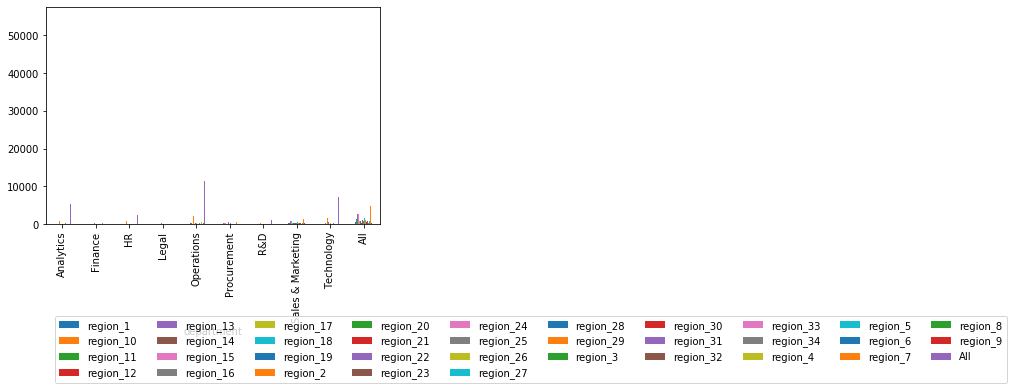

In [21]:
#contigency_table with barplot

plt.figure(figsize=(20,20))
contingency_table = pd.crosstab(
    df['department'],
    df['region'],
    margins = True
)
contingency_table.plot.bar();
plt.legend(loc='upper center',bbox_to_anchor=(1.45, -0.4),ncol=10)
plt.show()

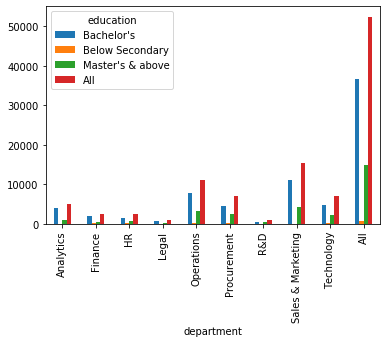

In [22]:
contingency_table = pd.crosstab(
    df['department'],
    df['education'],
    margins = True
)
contingency_table.plot.bar();

- Below Secondary contributes very less in all the department. Bachelor's degree contributes more as compare to Master's & above in all the department except R&D beacuse the Research and Development requires specilized person instead of bachelor's.

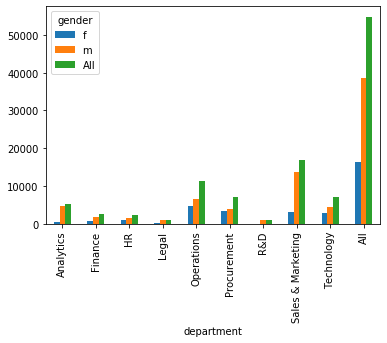

In [23]:
contingency_table = pd.crosstab(
    df['department'],
    df['gender'],
    margins = True
)
contingency_table.plot.bar();

- In every department number of Males is greater than female except R&D where female is negligible.

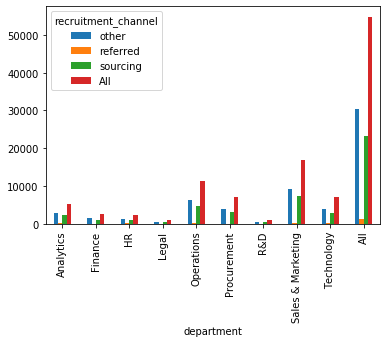

In [24]:
##Categorical and continuous

contingency_table = pd.crosstab(
    df['department'],
    df['recruitment_channel'],
    margins = True
)
contingency_table.plot.bar();

- No of referrel employee is quite less in all the department.

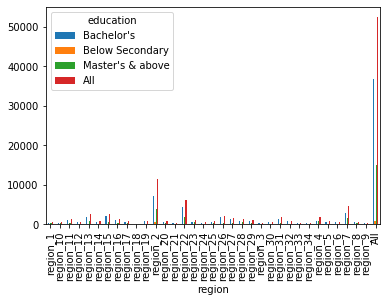

In [25]:
contingency_table = pd.crosstab(
    df['region'],
    df['education'],
    margins = True
)
contingency_table.plot.bar();

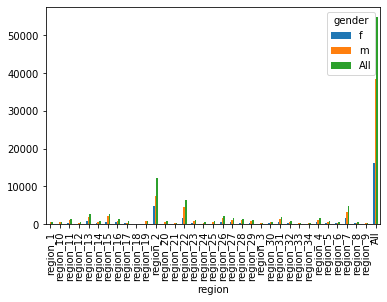

In [26]:
contingency_table = pd.crosstab(
    df['region'],
    df['gender'],
    margins = True
)
contingency_table.plot.bar();

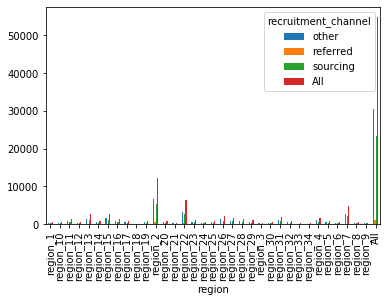

In [27]:
contingency_table = pd.crosstab(
    df['region'],
    df['recruitment_channel'],
    margins = True
)
contingency_table.plot.bar();

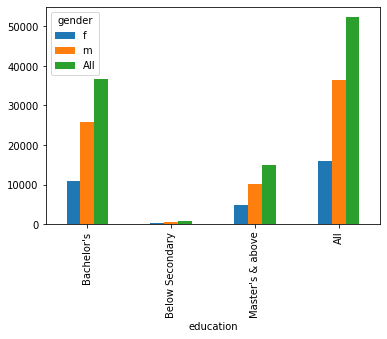

In [28]:
contingency_table = pd.crosstab(
    df['education'],
    df['gender'],
    margins = True
)
contingency_table.plot.bar();

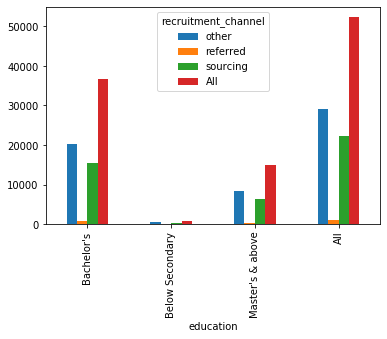

In [29]:
contingency_table = pd.crosstab(
    df['education'],
    df['recruitment_channel'],
    margins = True
)
contingency_table.plot.bar();

- Below Secondary has a less contribution to total number of employee.

##### Continuous and Categorical Variable EDA.

In [30]:
num_obj

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score']

In [31]:
cat_obj

['department', 'region', 'education', 'gender', 'recruitment_channel']

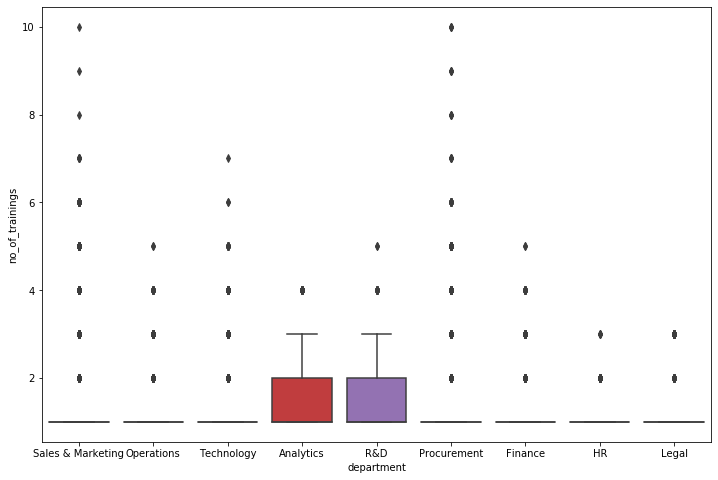

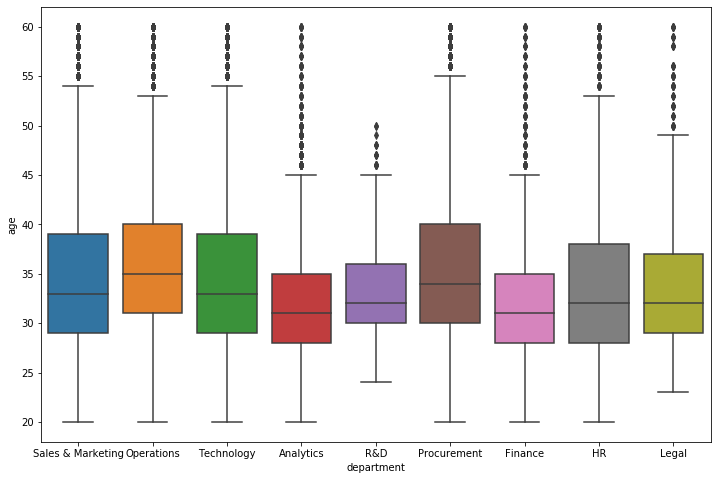

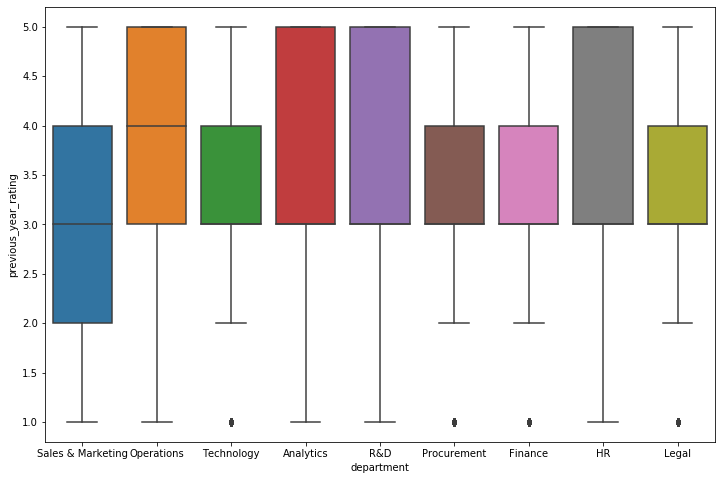

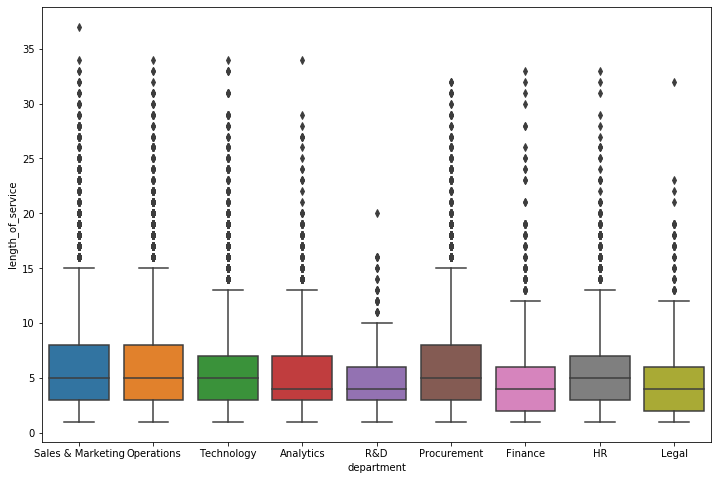

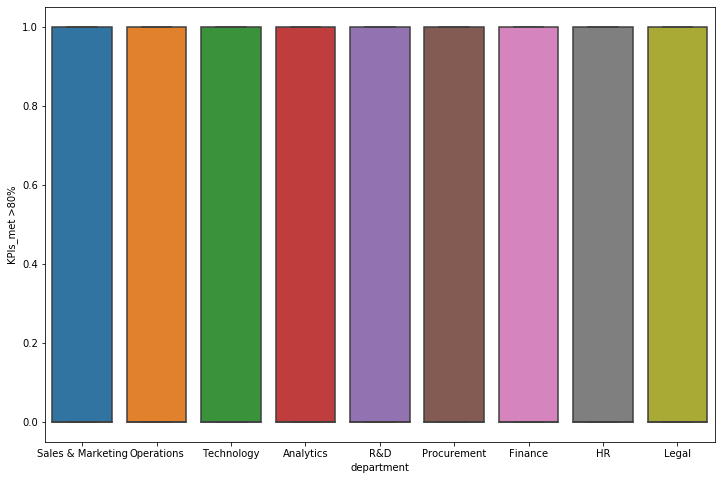

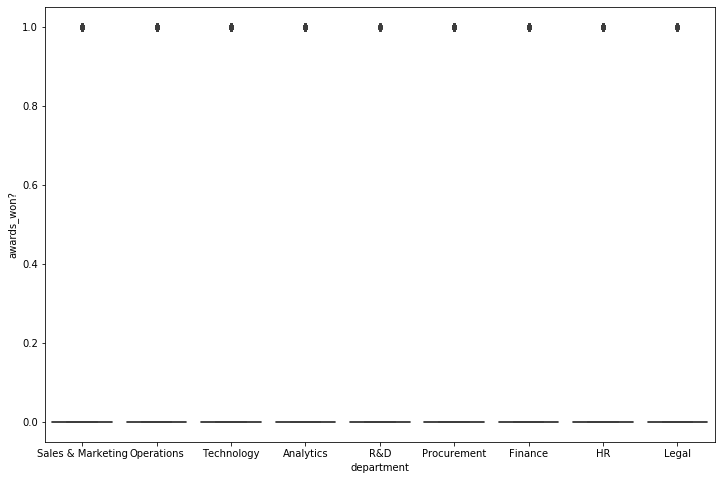

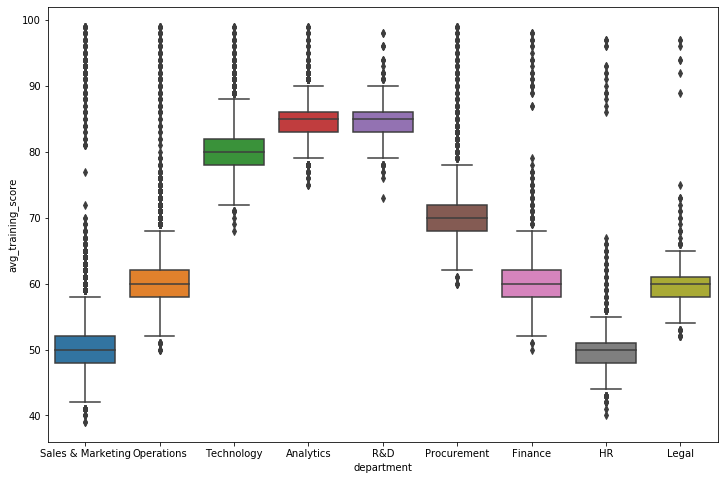

In [32]:
#boxplot for continuous variable with respect to "Department" variable.

for i in num_obj:
    plt.figure(figsize=(12,8))
    sns.boxplot(df['department'],df[i])
    plt.show()

- Here length of service is less in R&D department as compare to other all departments.
- Here "KPIs_met>80%" in all the department seems equal and for the sake of curse of dimensionality we can remove this feature as this feature becomes redundant for the analysis.
- In every department there is atleast one Award won employee eists.
- Median value of average training score in Analytics and R&D department is more as compare to other departments the reason behind might be the employee has a technical skills is more as compare to other departments and it seem obvious.

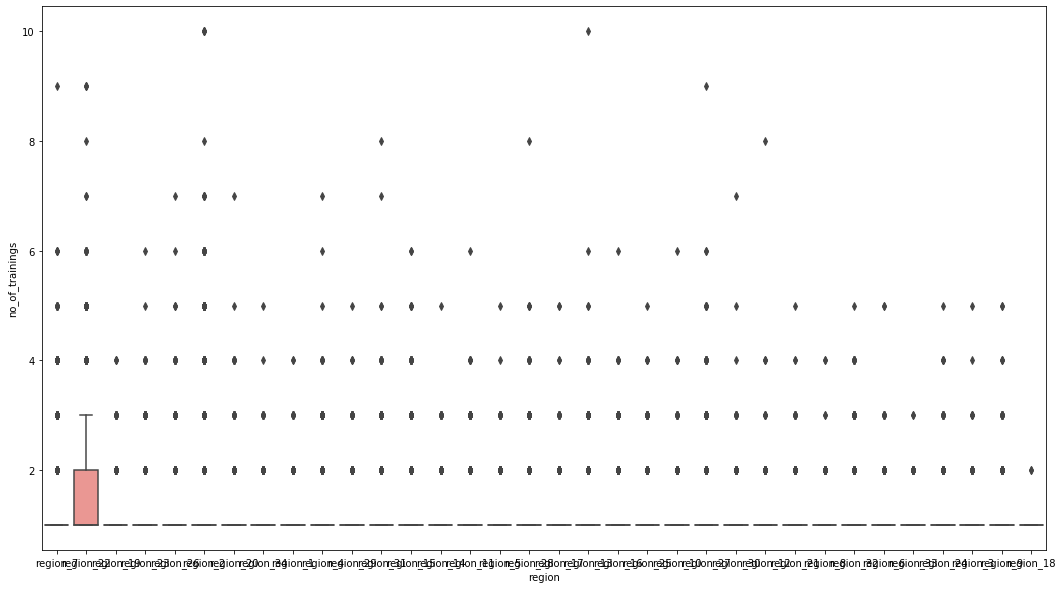

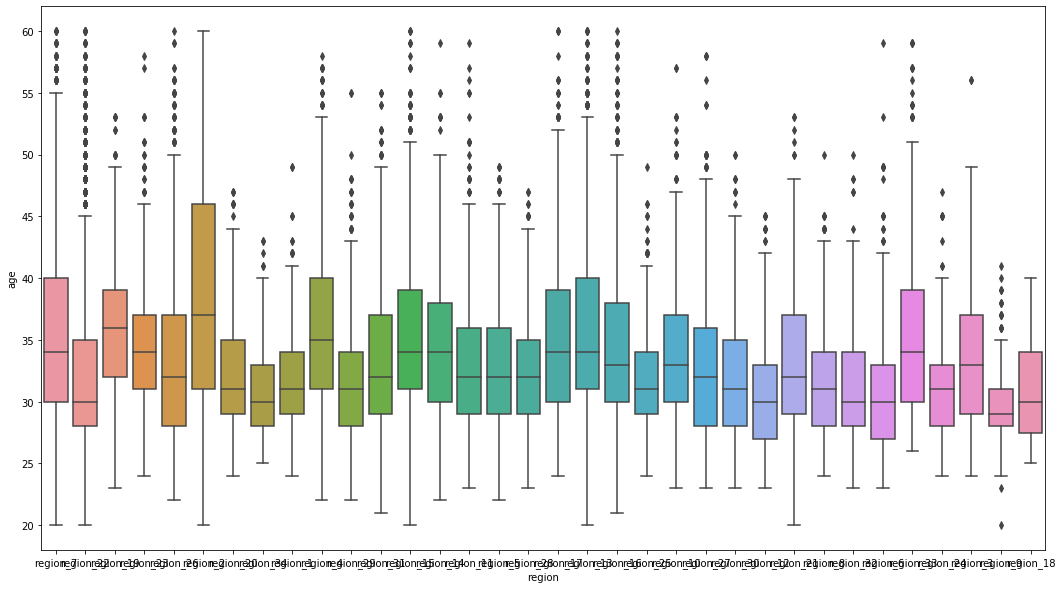

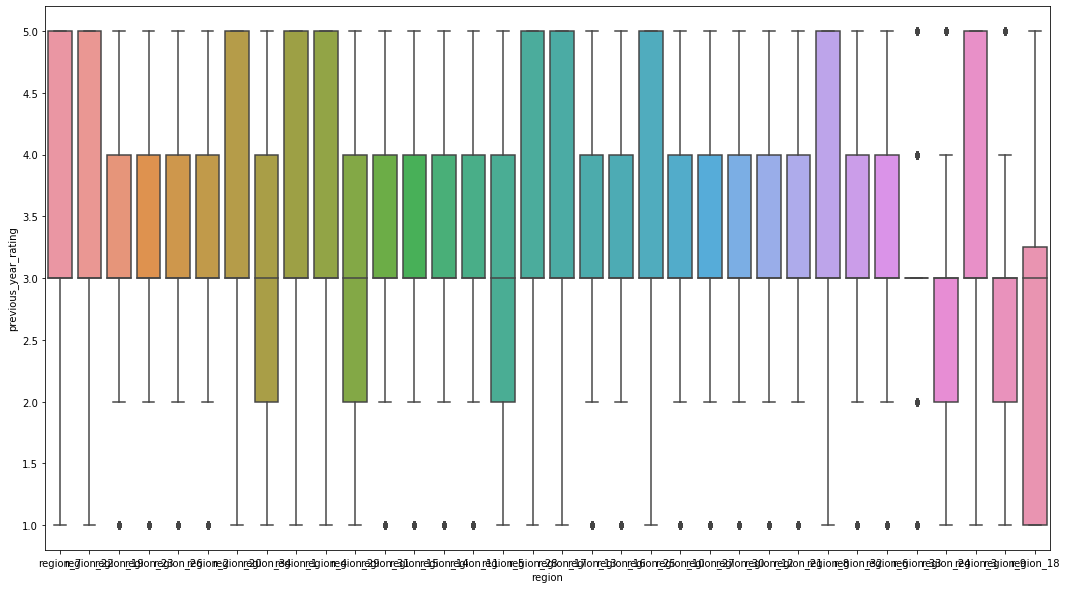

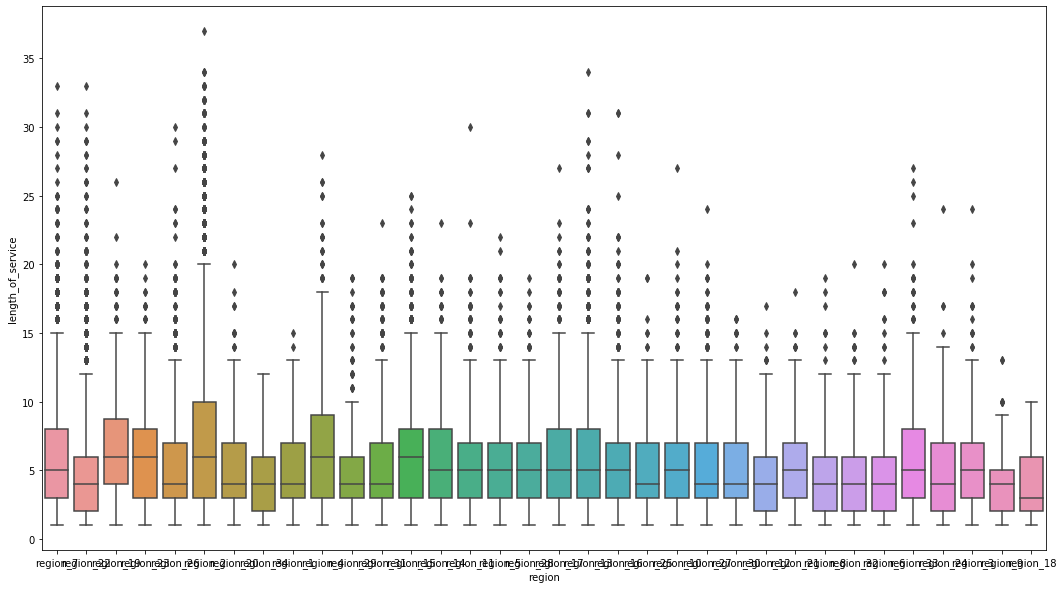

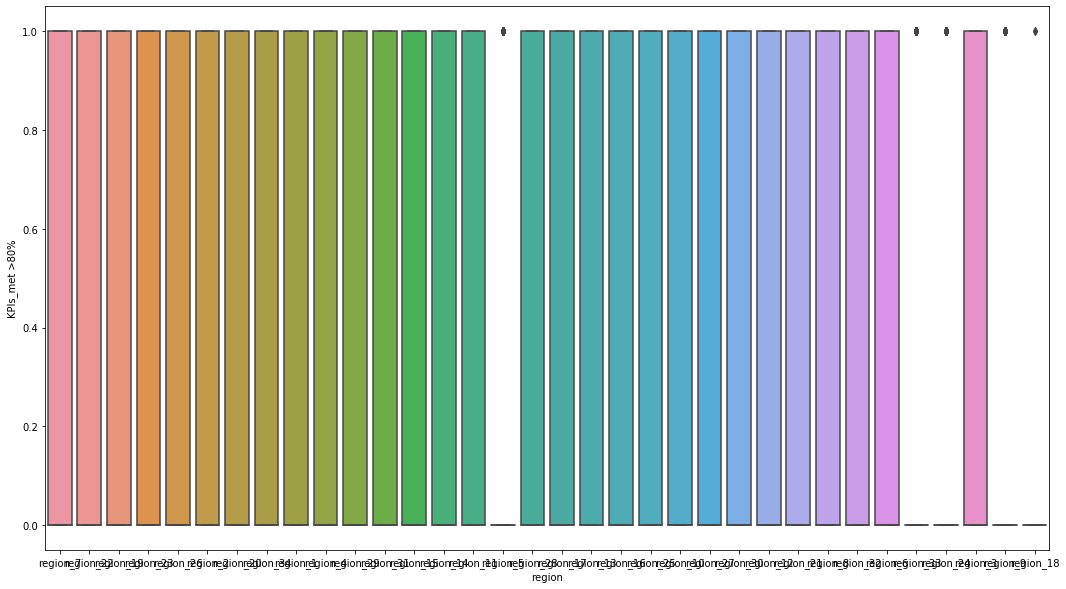

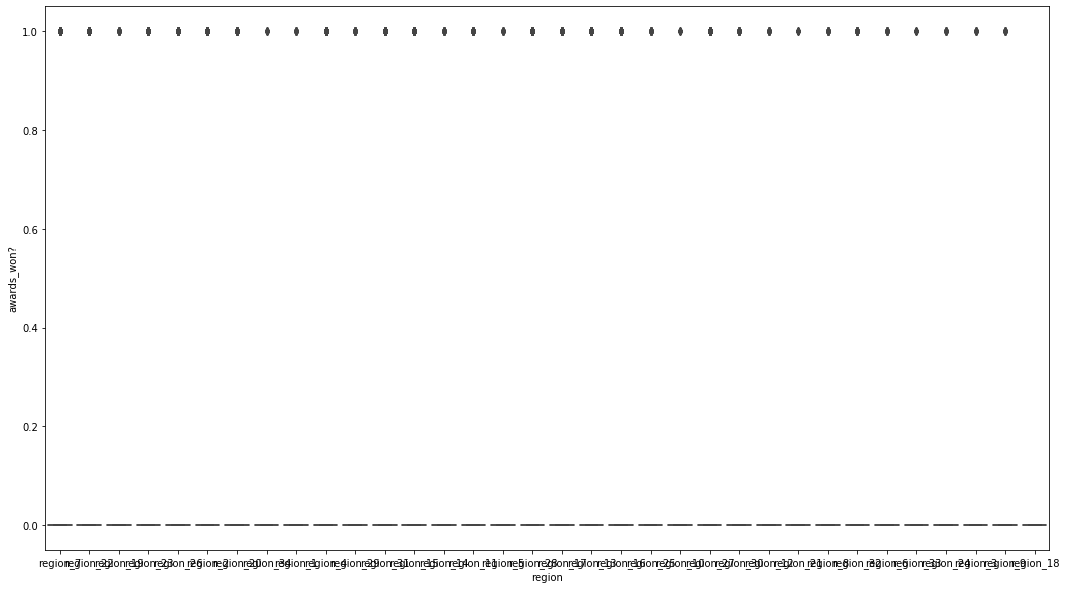

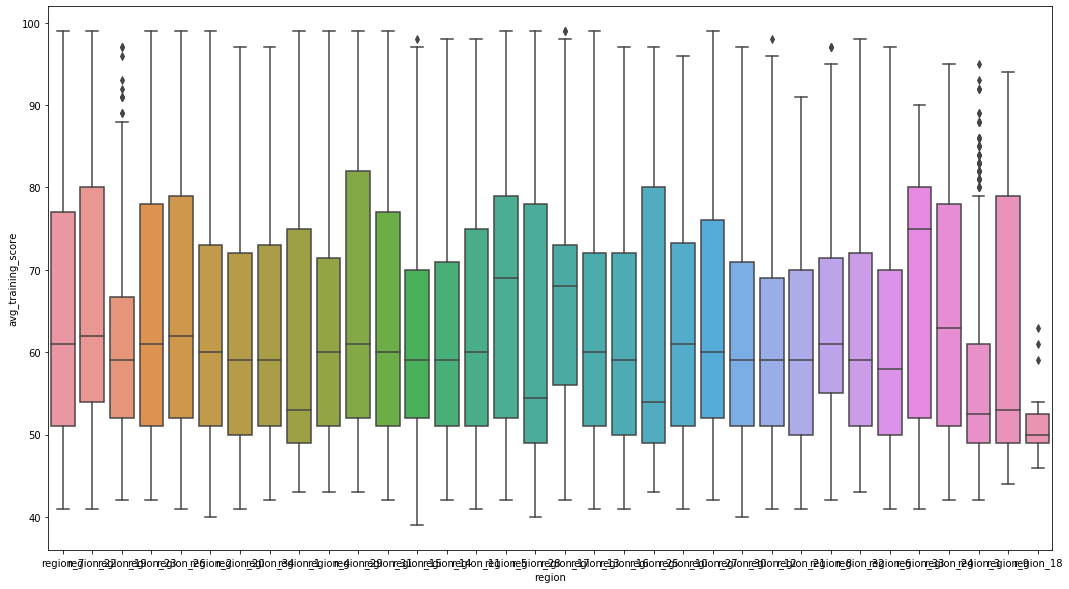

In [33]:
#boxPlot for the numerical variable with respect ot the "region" feature.
for i in num_obj:
    plt.figure(figsize=(18,10))
    sns.boxplot(df['region'],df[i])
    plt.show()

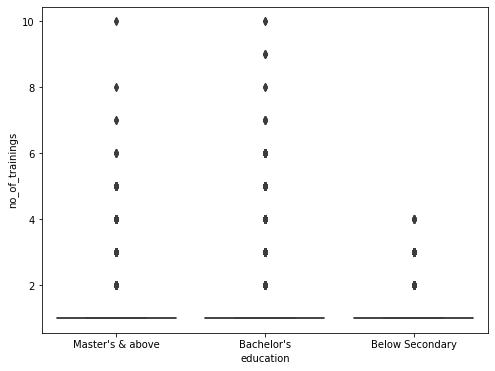

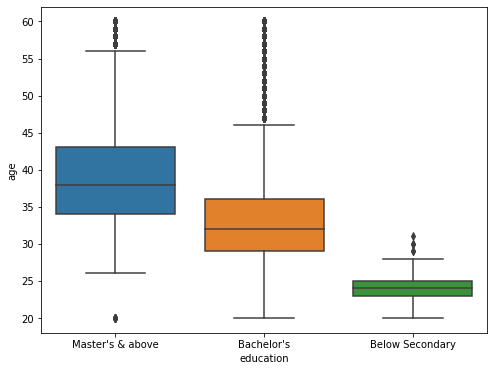

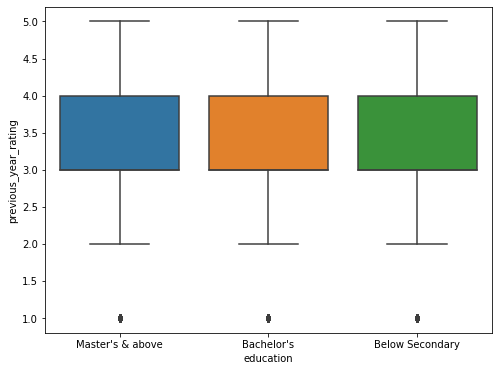

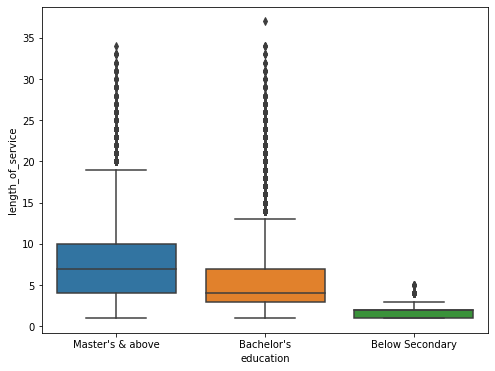

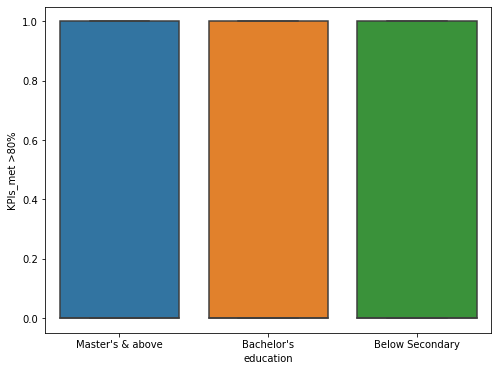

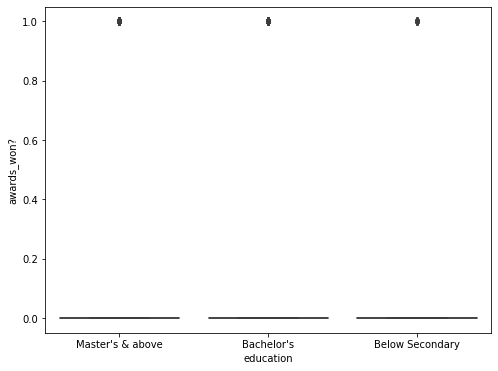

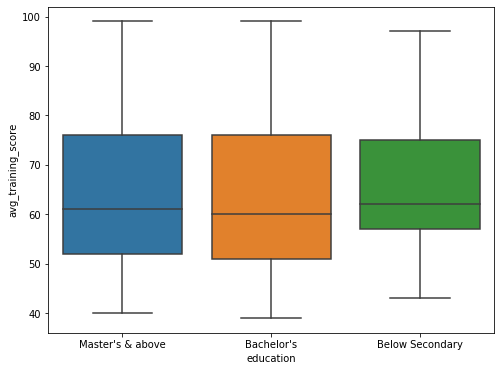

In [34]:
#boxplot for the continuous variable with respect to "education" variable.

for i in num_obj:
    plt.figure(figsize=(8,6))
    sns.boxplot(df['education'],df[i])
    plt.show()

- Here length of service from below secondary is quite less as it seems obvious.
- From every category of education there is atleast on award won employee.
- Age of below secondary employee is less as compare to other two as it seems obvious. Hence it would be great idea if we can distribute the age ino differnt length of bins.

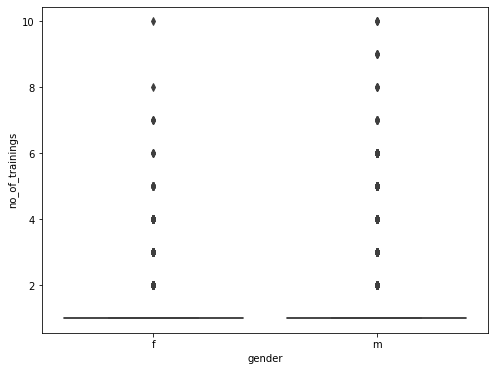

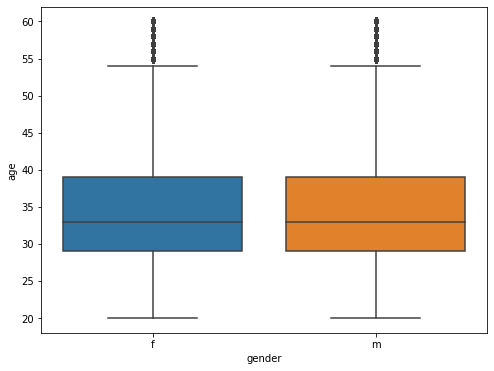

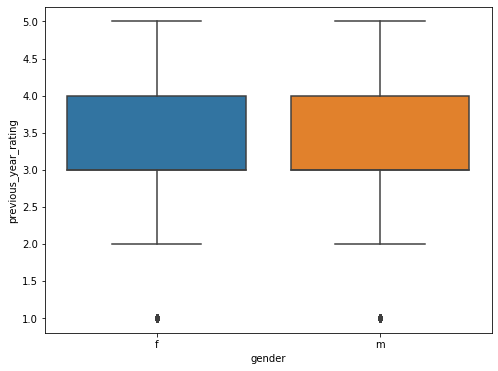

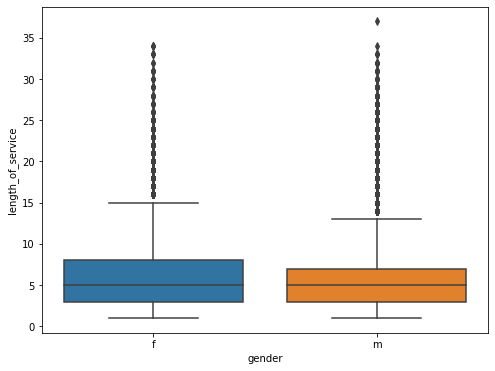

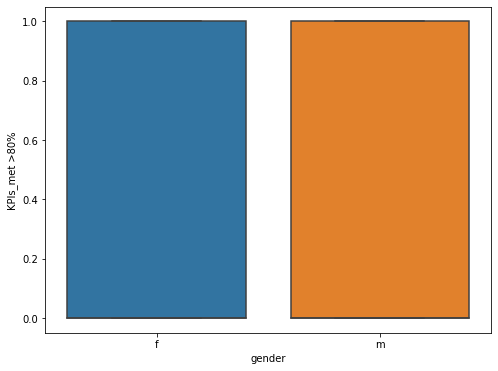

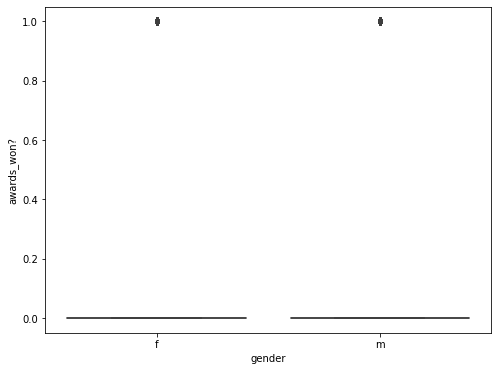

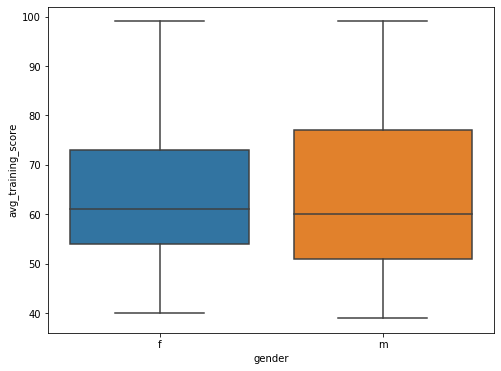

In [35]:
#boxplot for continuous data with respect to gender.
for i in num_obj:
    plt.figure(figsize=(8,6))
    sns.boxplot(df['gender'],df[i])
    plt.show()

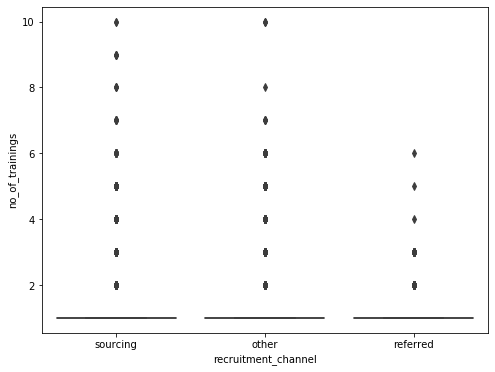

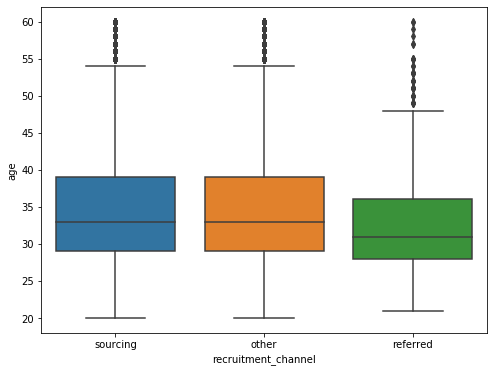

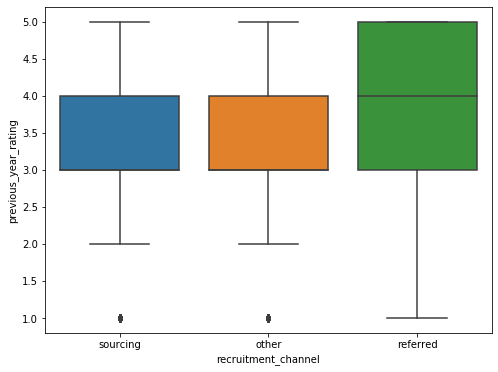

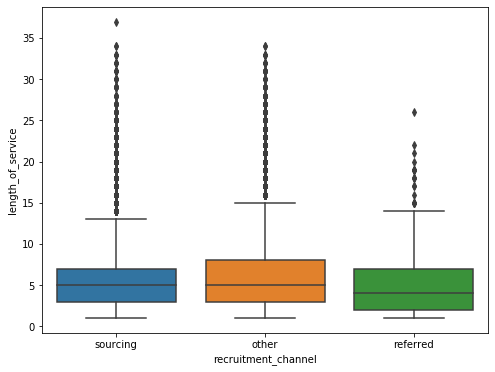

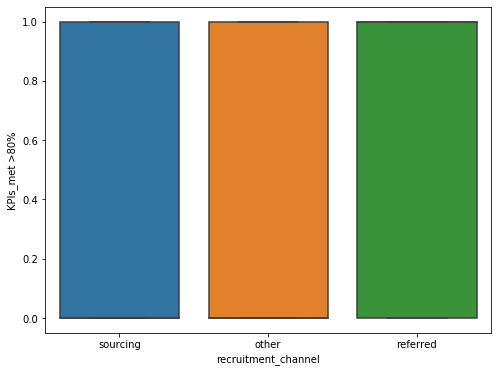

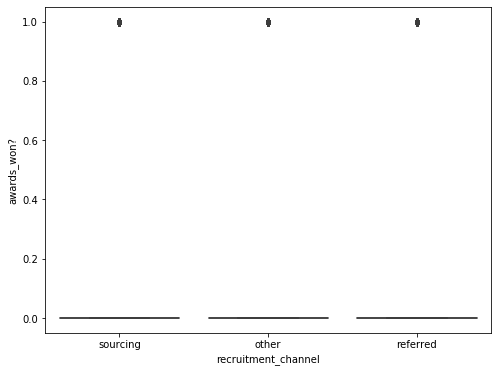

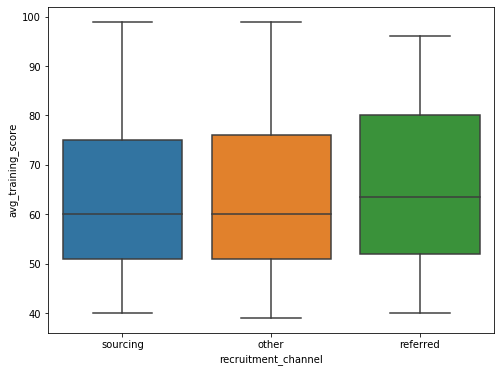

In [36]:
for i in num_obj:
    plt.figure(figsize=(8,6))
    sns.boxplot(df['recruitment_channel'],df[i])
    plt.show()

- Referred Candidate has maximum median "avg_training_score" as compare to other two's

In [37]:
#Name - Manish Kumar Sahu
#Contact Number : +91-9646511259
#Email ID - mkindian20@gmail.com